In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/yuvro/Downloads/UpdatedResumeDataSet.csv")

In [3]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
df["Category"].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

/Users/yuvro/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


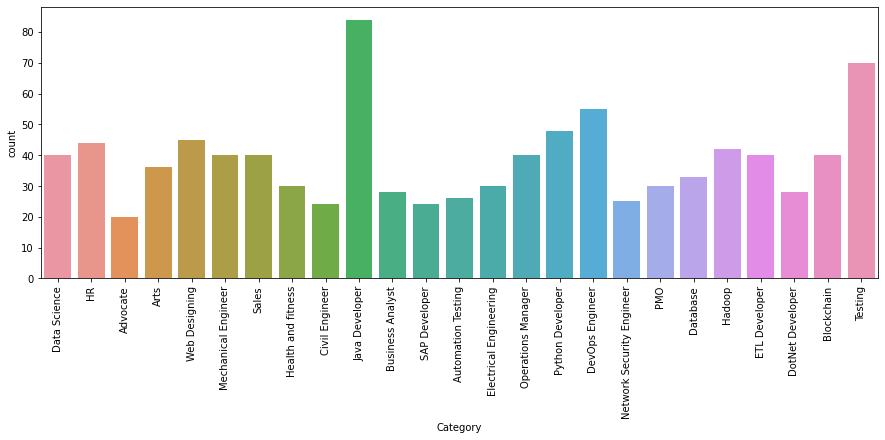

In [5]:
plt.figure(figsize = (15,5))
sns.countplot(df["Category"])
plt.xticks(rotation = 90)
plt.show()

([<matplotlib.patches.Wedge at 0x7fe1588daa90>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169058, 0.7714413269322118, 'HR'),
  Text(0.41347315634093784, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115721, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789803, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.2910572869646789, 

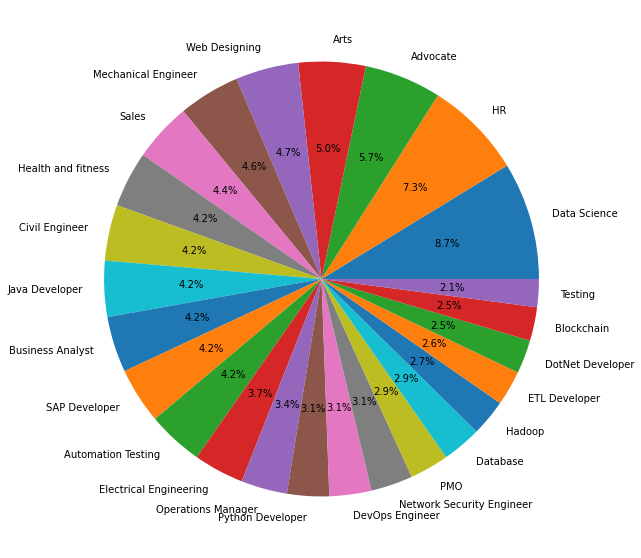

In [6]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()
plt.figure(figsize = (15,10))
plt.pie(counts, labels = labels, autopct = "%1.1f%%")

In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import unicodedata

def cleanResume(txt):
    # Normalize unicode characters
    txt = unicodedata.normalize('NFKD', txt).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # Remove URLs
    cleanTxt = re.sub(r"http\S+\s*", " ", txt)
    
    # Remove emails
    cleanTxt = re.sub(r"\S+@\S+", " ", cleanTxt)
    
    # Remove phone numbers (various formats)
    cleanTxt = re.sub(r"\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}", " ", cleanTxt)
    
    # Remove hashtags and mentions
    cleanTxt = re.sub(r"#\S+|@\S+", " ", cleanTxt)
    
    # Remove special characters and punctuation (non-alphanumeric)
    cleanTxt = re.sub(r"[^a-zA-Z0-9\s]", " ", cleanTxt)
    
    # Convert text to lowercase
    #cleanTxt = cleanTxt.lower()
    
    # Remove stop words
    
    return cleanTxt


[nltk_data] Downloading package stopwords to /Users/yuvro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
cleanResume("http://hihihi  $ {} $ [] and hi and @gmail and #99")

'           and hi and   and  '

In [9]:
df["Resume"] = df["Resume"].apply(lambda x : cleanResume(x))


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
import pickle
# Fit the encoder to the job positions (categories)
df["Category_Encoded"] = le.fit_transform(df["Category"])
print(df["Category_Encoded"])

# You now have a mapping between the original category and numerical values
# You can access this mapping like this:
category_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Inverse mapping to convert from numerical values to original categories
inverse_category_mapping = dict(zip(le.transform(le.classes_), le.classes_))

pickle.dump(le, open("label_encoder.pkl", "wb"))

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category_Encoded, Length: 962, dtype: int64


In [12]:
#le.fit(df["Category"])
#df["Category"] = le.transform(df["Category"])
df

,Category,Resume,Category_Encoded
0,Data Science,Skills Programming Languages Python pandas...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B E...,6
2,Data Science,Areas of Interest Deep Learning Control Syste...,6
3,Data Science,Skills a R a Python a SAP HANA a Tableau a SAP...,6
4,Data Science,Education Details \r\n MCA YMCAUST Faridab...,6
...,...,...,...
957,Testing,Computer Skills a Proficient in MS office Wo...,23
958,Testing,a Willingness to accept the challenges a Posi...,23
959,Testing,PERSONAL SKILLS a Quick learner a Eagerness t...,23
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power ...,23


In [13]:
#import sklearn.feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = "english")
tfidf.fit(df["Resume"])
reqText = tfidf.transform(df["Resume"])

In [14]:
reqText

<962x7388 sparse matrix of type '<class 'numpy.float64'>'
	with 164227 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(reqText, df["Category_Encoded"], test_size = 0.33)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

accuracy_score(y_test, ypred)

0.9685534591194969

In [18]:
# Predicting using the model
ypred = clf.predict(X_test)

# Convert the predicted numerical values back to job positions
predicted_categories = [inverse_category_mapping[num] for num in ypred]

# Now 'predicted_categories' will contain the original job position names

In [19]:
import pickle 
pickle.dump(tfidf, open("tfidf.pkl", "wb"))
pickle.dump(clf, open("clf.pkl", "wb"))

In [20]:
import pickle
tfidf = pickle.load(open("tfidf.pkl", "rb"))
clf = pickle.load(open("clf.pkl", "rb"))
le = pickle.load(open("label_encoder.pkl", "rb"))
new_resume = """
"""
# Assuming 'new_resume' is the text of the uploaded resume
new_resume_transformed = tfidf.transform([new_resume])

# Predict the category (numerical value)
predicted_category_num = clf.predict(new_resume_transformed)

# Convert the predicted numerical value back to the job position
predicted_category_name = inverse_category_mapping[predicted_category_num[0]]

print(f"The best fit position for you is: {predicted_category_name}")

The predicted job position is: Data Science
